### Importing modules and reading file

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [2]:
df= pd.read_csv(r'C:\Users\admin\Desktop\ML training\testing proj\student_perform_dataset.csv')

In [3]:
df.sample(5)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
95,F,KW,KuwaIT,lowerlevel,G-02,B,IT,F,Father,100,80,2,70,No,Bad,Under-7,H
229,M,KW,KuwaIT,MiddleSchool,G-08,A,Spanish,S,Father,5,17,21,10,No,Bad,Above-7,L
350,M,Egypt,Egypt,lowerlevel,G-02,B,French,F,Mum,5,13,6,6,No,Good,Above-7,L
278,M,Palestine,Jordan,MiddleSchool,G-06,A,English,F,Mum,82,31,52,25,No,Good,Under-7,M
48,F,KW,KuwaIT,HighSchool,G-12,A,English,F,Mum,13,80,40,88,Yes,Good,Under-7,H


In [4]:
target_col='Class'
cat_cols=['gender','SectionID','Topic','Semester','Relation','ParentAnsweringSurvey', 'ParentschoolSatisfaction','StudentAbsenceDays','StageID']
num_cols=['raisedhands','VisITedResources', 'AnnouncementsView', 'Discussion']
drop_cols=['NationalITy','PlaceofBirth','GradeID']

In [5]:
# convertine class into numerical data
df['Class'] = df['Class'].replace(['M'], 2)
df['Class'] = df['Class'].replace(['H'], 1)
df['Class'] = df['Class'].replace(['L'], 3)
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,2
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,2
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,3
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,3
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,2


In [6]:
df['Class']=df['Class'].astype(int)

In [7]:
data = pd.get_dummies(df).drop('gender_F',axis=1)

In [8]:
data.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class,gender_M,NationalITy_Egypt,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,...,Semester_F,Semester_S,Relation_Father,Relation_Mum,ParentAnsweringSurvey_No,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Bad,ParentschoolSatisfaction_Good,StudentAbsenceDays_Above-7,StudentAbsenceDays_Under-7
0,15,16,2,20,2,1,0,0,0,0,...,1,0,1,0,0,1,0,1,0,1
1,20,20,3,25,2,1,0,0,0,0,...,1,0,1,0,0,1,0,1,0,1
2,10,7,0,30,3,1,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
3,30,25,5,35,3,1,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
4,40,50,12,50,2,1,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [9]:
target = data[target_col]
features = data.drop(target_col, axis=1)

### DATA SPLITTING

In [10]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(features, target, test_size=0.25, random_state=101)

### Model Creation & Training


In [11]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(xtrain,ytrain)

LogisticRegression()

### Model Evaluation

In [12]:
print(round(100 * model.score(xtest, ytest)),'%')

79 %


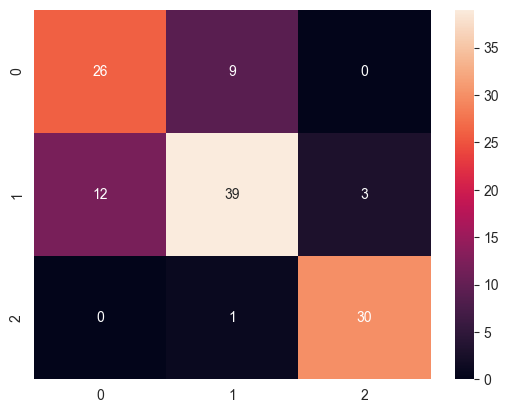

              precision    recall  f1-score   support

           1       0.68      0.74      0.71        35
           2       0.80      0.72      0.76        54
           3       0.91      0.97      0.94        31

    accuracy                           0.79       120
   macro avg       0.80      0.81      0.80       120
weighted avg       0.79      0.79      0.79       120



In [13]:
# Confusion Matrix and Classification Report
from sklearn.metrics import confusion_matrix, classification_report
ytest_pred = model.predict(xtest)
sns.heatmap(confusion_matrix(ytest,ytest_pred), annot = True, fmt='d')
plt.show()

print(classification_report(ytest,ytest_pred))

In [14]:
pd.Series(ytest_pred).value_counts()

2    49
1    38
3    33
dtype: int64

### Improving the model

In [15]:
for algo in ['newton-cg','lbfgs','liblinear','sag', 'saga']:
    print(algo)
    model1 = LogisticRegression(random_state=101,solver=algo,tol=1,C=1)
    model1.fit(xtrain,ytrain)
    print(classification_report(ytest,model1.predict(xtest)))

newton-cg
              precision    recall  f1-score   support

           1       0.69      0.69      0.69        35
           2       0.77      0.74      0.75        54
           3       0.91      0.97      0.94        31

    accuracy                           0.78       120
   macro avg       0.79      0.80      0.79       120
weighted avg       0.78      0.78      0.78       120

lbfgs
              precision    recall  f1-score   support

           1       0.68      0.74      0.71        35
           2       0.80      0.72      0.76        54
           3       0.91      0.97      0.94        31

    accuracy                           0.79       120
   macro avg       0.80      0.81      0.80       120
weighted avg       0.79      0.79      0.79       120

liblinear
              precision    recall  f1-score   support

           1       0.36      0.49      0.41        35
           2       0.47      0.61      0.53        54
           3       1.00      0.10      0.18      

In [16]:
xtrain,xtest,ytrain,ytest

(     raisedhands  VisITedResources  AnnouncementsView  Discussion  gender_M  \
 51            39                15                 16          50         1   
 4             40                50                 12          50         1   
 449           81                84                 77          85         1   
 176           60                52                 23          33         1   
 64             0                 5                  7           2         1   
 ..           ...               ...                ...         ...       ...   
 63            17                13                 16          12         1   
 326           10                15                 10          21         1   
 337           75                80                 15          20         0   
 11            19                 6                 19          12         1   
 351            7                 9                 11          10         1   
 
      NationalITy_Egypt  NationalITy_I

In [17]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()
model_dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [18]:
print(classification_report(ytest,model_dt.predict(xtest)))

              precision    recall  f1-score   support

           1       0.63      0.63      0.63        35
           2       0.67      0.63      0.65        54
           3       0.76      0.84      0.80        31

    accuracy                           0.68       120
   macro avg       0.69      0.70      0.69       120
weighted avg       0.68      0.68      0.68       120



In [19]:
pd.DataFrame(model_dt.feature_importances_,index=xtrain.columns, columns=['Importance']).sort_values(by='Importance',ascending=False).head(10)

,Importance
VisITedResources,0.207814
StudentAbsenceDays_Under-7,0.205311
raisedhands,0.115088
AnnouncementsView,0.093298
Discussion,0.060859
gender_M,0.044120
Relation_Father,0.039521
NationalITy_SaudiArabia,0.025440
SectionID_B,0.022744
Topic_French,0.021625


In [39]:
imp_cols =['StudentAbsenceDays_Under-7','VisITedResources','AnnouncementsView','raisedhands']

In [40]:
from sklearn.tree import DecisionTreeClassifier

model_dt2 = DecisionTreeClassifier().fit(xtrain[imp_cols],ytrain)
print(classification_report(ytest,model_dt2.predict(xtest[imp_cols])))

              precision    recall  f1-score   support

           1       0.55      0.51      0.53        35
           2       0.62      0.67      0.64        54
           3       0.86      0.81      0.83        31

    accuracy                           0.66       120
   macro avg       0.68      0.66      0.67       120
weighted avg       0.66      0.66      0.66       120



In [37]:
from sklearn.ensemble import RandomForestClassifier

model_rf= RandomForestClassifier().fit(xtrain,ytrain)
print(classification_report(ytest,model_rf.predict(xtest)))

              precision    recall  f1-score   support

           1       0.68      0.80      0.74        35
           2       0.82      0.67      0.73        54
           3       0.86      0.97      0.91        31

    accuracy                           0.78       120
   macro avg       0.79      0.81      0.79       120
weighted avg       0.79      0.78      0.78       120



In [23]:
pd.DataFrame(model_rf.feature_importances_,index=xtrain.columns, columns=['Importance']).sort_values(by='Importance',ascending=False)

,Importance
VisITedResources,0.140011
raisedhands,0.110818
AnnouncementsView,0.099300
StudentAbsenceDays_Above-7,0.073685
StudentAbsenceDays_Under-7,0.072121
...,...
PlaceofBirth_Lybia,0.000456
GradeID_G-10,0.000363
GradeID_G-05,0.000362
NationalITy_venzuela,0.000162


In [24]:
model_rf2= RandomForestClassifier().fit(xtrain[imp_cols],ytrain)
print(classification_report(ytest,model_rf2.predict(xtest[imp_cols])))

              precision    recall  f1-score   support

           1       0.56      0.51      0.54        35
           2       0.62      0.65      0.64        54
           3       0.84      0.87      0.86        31

    accuracy                           0.67       120
   macro avg       0.68      0.68      0.68       120
weighted avg       0.66      0.67      0.66       120



##### (After applying various algorithm .it is observed that the best score is around ~80% with the logistic regression only)

### Making pickle file

In [25]:
# pd.to_pickle(model_rf2,'student_perform_RF2.pickle')
# pd.to_pickle(model,'student_perform_R.pickle') 